In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# word_to_id
word_index = imdb.get_word_index()

In [ ]:
vocab_size = len(word_index)

In [ ]:
len(word_index)

88588

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# id_to_word
# 1
revserse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# 2
revserse_word_index = {}
for (key, value) in word_index.items():
  revserse_word_index[value] = key

In [ ]:
len(word_index), len(revserse_word_index)

(88588, 88588)

In [ ]:
def decode_review(text):
  return ' '.join([revserse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(train_data[0])

"<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part'

In [ ]:
len(train_data[0]), len(train_data[10]), len(train_data[5])


(218, 450, 43)

In [ ]:
print(train_data[10])

[1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 30432, 883, 10789, 23, 8, 4, 136, 13772, 11631, 4, 7475, 43, 1076, 21, 1407, 419, 5, 5202, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 13772, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 17547, 34, 4, 321, 487, 5, 116, 15, 6584, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 14799, 1412, 8, 1172, 18, 7865, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 5341, 2140, 20250, 648, 1430, 10136, 8914, 5, 27, 3000, 1432, 7130, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 7740, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 14040, 103, 19100, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448,

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, 
                                              value=0,
                                              padding='pre',
                                              maxlen=256
                                              )
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, 
                                              value=0,
                                              padding='pre', 
                                              maxlen=256
                                              )

In [ ]:
len(train_data[0]), len(train_data[10]), len(train_data[5])


(256, 256, 256)

In [ ]:
vocab_size = len(word_index)
# vocab_size = 10000
model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(vocab_size, 16, input_shape=(None,)),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          1417408   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,417,697
Trainable params: 1,417,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, 
          train_labels, 
          epochs=15, 
          batch_size=512, 
          validation_data=(test_data, test_labels))

Epoch 1/15
49/49 [==============================] - 2s 38ms/step - loss: 0.6908 - accuracy: 0.5738 - val_loss: 0.6865 - val_accuracy: 0.6170
Epoch 2/15
49/49 [==============================] - 2s 35ms/step - loss: 0.6764 - accuracy: 0.7043 - val_loss: 0.6650 - val_accuracy: 0.7391
Epoch 3/15
49/49 [==============================] - 2s 34ms/step - loss: 0.6405 - accuracy: 0.7774 - val_loss: 0.6201 - val_accuracy: 0.7698
Epoch 4/15
49/49 [==============================] - 2s 35ms/step - loss: 0.5766 - accuracy: 0.8170 - val_loss: 0.5536 - val_accuracy: 0.8073
Epoch 5/15
49/49 [==============================] - 2s 36ms/step - loss: 0.4971 - accuracy: 0.8478 - val_loss: 0.4842 - val_accuracy: 0.8339
Epoch 6/15
49/49 [==============================] - 2s 35ms/step - loss: 0.4208 - accuracy: 0.8733 - val_loss: 0.4274 - val_accuracy: 0.8484
Epoch 7/15
49/49 [==============================] - 2s 34ms/step - loss: 0.3590 - accuracy: 0.8891 - val_loss: 0.3848 - val_accuracy: 0.8578
Epoch 8/15
49

In [ ]:
model.evaluate(test_data, test_labels)

782/782 [==============================] - 2s 3ms/step - loss: 0.2897 - accuracy: 0.8820


[0.2897310256958008, 0.8819599747657776]

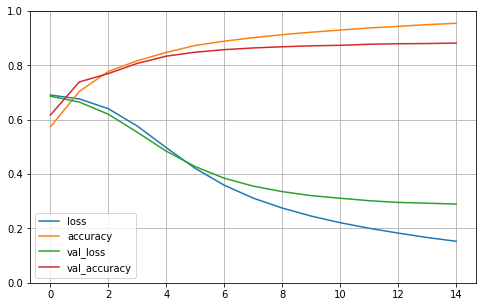

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()